<a href="https://colab.research.google.com/github/seung12345/project/blob/main/Canny_Edge_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/soonkijung/cv-datasets

Cloning into 'cv-datasets'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 40 (delta 2), reused 0 (delta 0), pack-reused 37
Unpacking objects: 100% (40/40), done.


In [3]:
# 1.Noise Reduction

import numpy as np

#mgrid
np.mgrid[-2:3, -2:3]

def gaussain_kernel(size, sigma=1):
    hsize=int(size) //2
    x, y=np.mgrid[-hsize:hsize+1, -hsize:hsize+1]
    normal = 1/(2.0 * np.pi *sigma **2)
    g=np.exp(-((x**2 + y**2)/(2.0 * sigma **2 ))) * normal
    return g

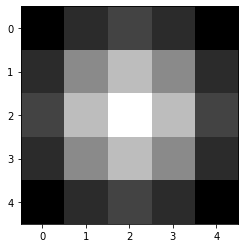

In [4]:
g2= gaussain_kernel(5, 1.4)

from matplotlib import pyplot as plt 
plt.imshow(g2, cmap='gray')

Text(0.5, -0.1, '{b}')

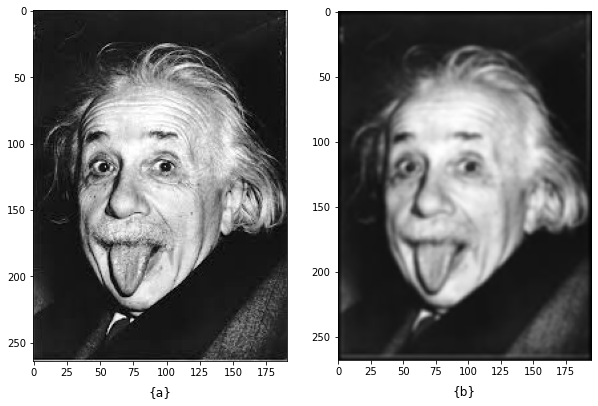

In [10]:
from skimage import io
from skimage import color
from scipy import signal

img= color.rgb2gray(io.imread('/content/cv-datasets/einstein.jpeg'))
gkernel=gaussain_kernel(5, 1.4)
blurImage=signal.convolve2d(img, gkernel)

fig, axs=plt.subplots(1,2,figsize=(10, 6.5))
axs[0].imshow(img, cmap='gray')
axs[0].text(0.5, -0.1, '{a}', size=12, ha='center', transform=axs[0].transAxes)
axs[1].imshow(blurImage, cmap='gray')
axs[1].text(0.5, -0.1, '{b}', size=12, ha='center', transform=axs[1].transAxes)


In [11]:
# gradient calculation

from scipy import ndimage
from matplotlib import gridspec

def sobel_filters(img):
    Kx=np.array([[-1,0,1],[-2,0,2],[-1,0,1]], np.float32)
    Ky=np.array([[1,2,1],[0,0,0],[-1,-2,-1]], np.float32)

    Ix=ndimage.filters.convolve(img,Kx)
    Iy=ndimage.filters.convolve(img,Ky)

    G=np.hypot(Ix,Iy)
    G= G/G.max() * 255
    theta=np.arctan2(Iy,Ix)

    return (G, theta)

Text(0.5, -0.1, '{b}')

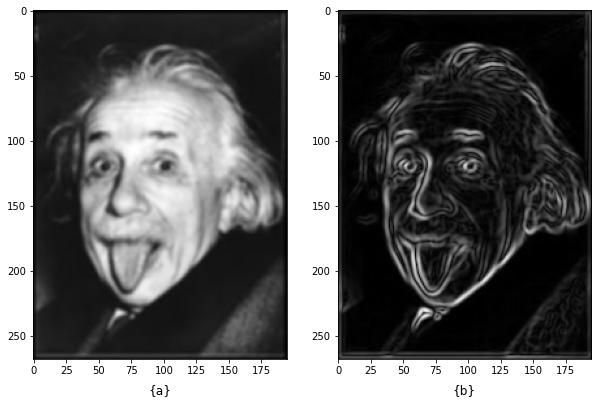

In [12]:
gradMag, gradDir = sobel_filters(blurImage)

fig, axs=plt.subplots(1,2,figsize=(10, 6.5))
axs[0].imshow(blurImage, cmap='gray')
axs[0].text(0.5, -0.1, '{a}', size=12, ha='center', transform=axs[0].transAxes)
axs[1].imshow(gradMag, cmap='gray')
axs[1].text(0.5, -0.1, '{b}', size=12, ha='center', transform=axs[1].transAxes)

#변화가 많을수록 하얀색

In [ ]:
#Non-Maximum Suppression
#두꺼운 edge를 얇게
#edge 방향으로 가장 큰 값을 갖는애만 edge로 표시

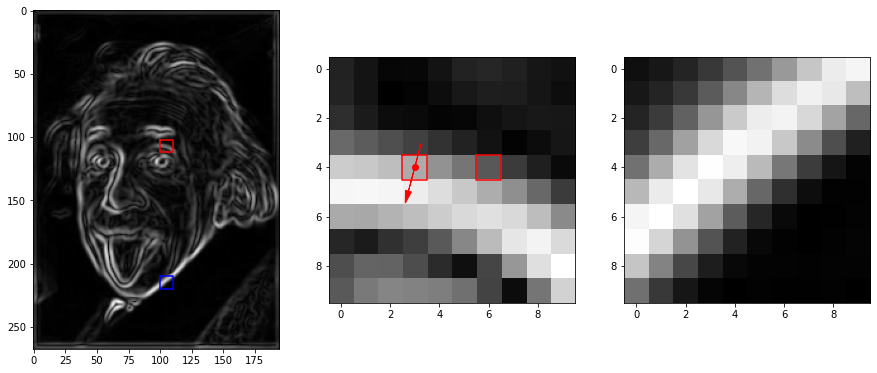

In [17]:
#for testing

sPt=[102,100,210,100] #y1, x1, y2, x2
sSize=10
f1=gradMag[sPt[0]:sPt[0]+sSize, sPt[1]:sPt[1]+sSize]
th1=gradDir[sPt[0]:sPt[0]+sSize, sPt[1]:sPt[1]+sSize]
f2=gradMag[sPt[2]:sPt[2]+sSize, sPt[3]:sPt[3]+sSize]
th2=gradDir[sPt[2]:sPt[2]+sSize, sPt[3]:sPt[3]+sSize]

def drawBox(ax,xp,yp,size,color):
    ax.plot([xp,xp+size,xp+size,xp,xp],[yp,yp,yp+size,yp+size,yp], color=color)

def drawArrow(ax,xp,yp,length,theta,color):
    hl=length/2
    dx=np.cos(theta)
    dy=-np.sin(theta)
    ax.scatter([xp],[yp], color=color)
    ax.arrow(xp-hl*dx, yp-hl*dy, length*dx, length*dy, head_width=0.25, head_length=0.5, color='red')

fig,axs=plt.subplots(1,3,figsize=(15, 6.5))
axs[0].imshow(gradMag, cmap='gray')
drawBox(axs[0],sPt[1],sPt[0],sSize,'red')
drawBox(axs[0],sPt[3],sPt[2],sSize,'blue')

axs[1].imshow(f1,cmap='gray')
pts=[3,4,6,4]
drawBox(axs[1], pts[0]-0.5, pts[1]-0.5,1,'red')
drawArrow(axs[1], pts[0], pts[1], 2, th1[pts[1], pts[0]], 'red')
drawBox(axs[1], pts[2]-0.5, pts[3]-0.5,1,'red')

axs[2].imshow(f2, cmap='gray')
plt.show()

In [20]:
def non_max_suppression(img, D):
    M,N=img.shape 
    z=np.zeros((M,N), dtype=np.int32)
    angle= D * 180. /np.pi
    angle[angle<0] +=180

    for i in range(1,M-1):
        for j in range(1, N-1):
            try:
                q=255
                r=255

                if(0<=angle[i,j]<22.5) or (157.5 <=angle[i,j]<=180):
                    q=img[i,j+1]
                    r=img[i,j-1]
                elif (22.5 <= angle[i,j] < 67.5):
                    q=img[i+1, j-1]
                    r=img[i-1, j+1]
                elif (67.5 <= angle[i,j]<112.5):
                    q=img[i+1,j]
                    r=img[i-1,j]
                elif (112.5<=angle[i,j]<157.5):
                    q=img[i-1, j-1]
                    r=img[i+1, j+1]

                if(img[i,j] >= q) and (img[i,j] >=r):
                    z[i,j]=img[i,j]
                else:
                    z[i,j]=0
            except IndexError as e:
                pass
    return z


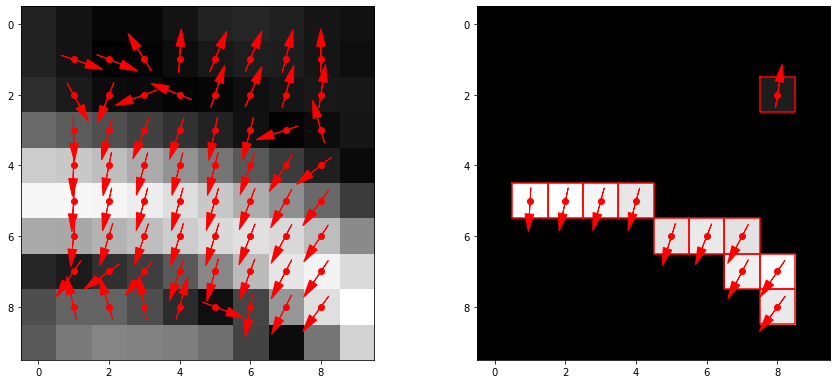

In [24]:
z1=non_max_suppression(f1,th1)

fig,axs=plt.subplots(1,2,figsize=(15, 6.5))

axs[0].imshow(f1, cmap='gray')
for y in range(1, f1.shape[0]-1):
    for x in range(1, f1.shape[1]-1):
        drawArrow(axs[0], x, y, 0.75, th1[y,x], 'red')

axs[1].imshow(z1, cmap='gray')
for y in range(1, f1.shape[0]-1):
    for x in range(1, f1.
                   shape[1]-1):
        if z1[y,x]==0: continue
        drawBox(axs[1], x-0.5, y-0.5,1,'red')
        drawArrow(axs[1], x, y, 0.75, th1[y,x], 'red')

plt.show()


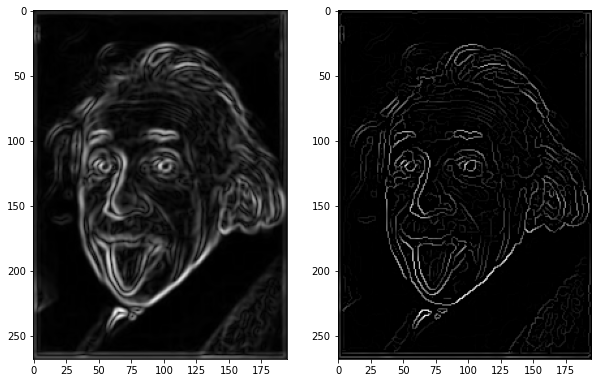

In [26]:
z=non_max_suppression(gradMag, gradDir)

fig, axs=plt.subplots(1,2, figsize=(10,6.5))
axs[0].imshow(gradMag, cmap='gray')
axs[1].imshow(z, cmap='gray')

In [28]:
# 4.Double Threshold

def threshold(img, lowThresholdRatio=0.05, highThresholdRatio=0.09):
    highThreshold=img.max()* highThresholdRatio
    lowThreshold=highThreshold*lowThresholdRatio

    M,N=img.shape
    res=np.zeros((M,N), dtype=np.int32)

    weak=np.int32(127)
    strong=np.int32(255)

    strong_i, strong_j =np.where(img>=highThreshold)
    zeros_i, zeros_j=np.where(img <lowThreshold)

    weak_i, weak_j=np.where((img<highThreshold) & (img>= lowThreshold))

    res[strong_i, strong_j]=strong
    res[weak_i, weak_j]=weak

    return (res,weak,strong)

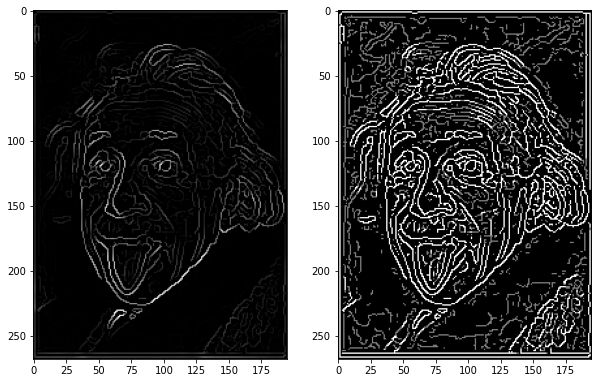

In [51]:
Zthresh, weak, strong=threshold(z, 0.05,0.09)

fig, axs=plt.subplots(1,2, figsize=(10, 6.5))
axs[0].imshow(z, cmap='gray')
axs[1].imshow(Zthresh, cmap='gray')

In [80]:
# 5. Edge Traking by Hysteresis

#strong edge와 연결된 weak있으면 strong으로 바꾼다.
d=np.array([[1,1,1,0,0,-1,-1,-1],[1,0,-1,1,-1,1,0,-1]])

def trackEdge(img, i,j, weak=127, strong=255):
    img[i,j]=strong
    idxs=np.array(([i],[j])) + d
    for p,q in zip(idxs[0], idxs[1]):
        try:
            if img[p,q] == weak:
                trackEdge(img, p,q)
        except IndexError:
            pass
def hysteresis(img, weak=127, strong=255):
    strongIdx= np.where(img == strong)

    for i, j in zip(strongIdx[0], strongIdx[1]):
        idxs=np.array(([i],[j])) +d
        for p,q in zip(idxs[0], idxs[1]):
            try:
                if img[p,q]==weak:
                    trackEdge(img,p,q)
            except IndexError:
                pass

    weakIdx=np.where(img==weak)
    for i,j in zip(weakIdx[0], weakIdx[1]):
        img[i,j]=0
    return img

[[2 2 2 1 1 0 0 0]
 [2 1 0 2 0 2 1 0]]


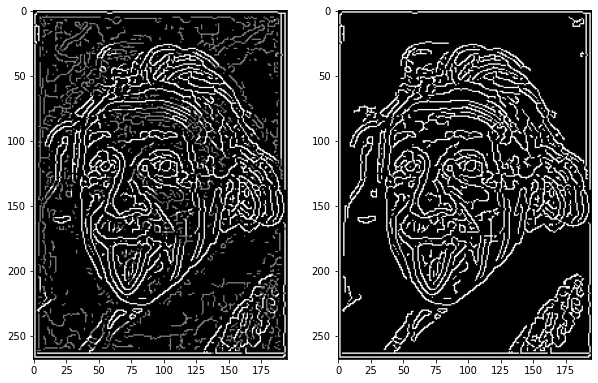

In [81]:
finalImg=Zthresh.copy()
finalImg=hysteresis(finalImg,weak)

fig, axs=plt.subplots(1,2, figsize=(10, 6.5))
axs[0].imshow(Zthresh, cmap='gray')
axs[1].imshow(finalImg, cmap='gray')
